In [18]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import os

from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
data_path = '/content/drive/MyDrive/Colab Notebooks/Data Mining/Data/'

In [21]:
os.listdir(data_path)

['LLCP2022.XPT ',
 'X_Xinya.csv',
 'Zhiquan.csv',
 'Grace.csv',
 'keni_data.csv',
 'Grace.gsheet',
 'Lavanya.csv',
 'data_all.csv',
 'Data_Xinya_0408.csv',
 'Copy of Data_all_0409.csv',
 'Copy of Data_CD_0409.csv',
 'df2022_WiClass.csv',
 '240414_IndFeatureAnalysis_keni.ipynb']

In [22]:
df_full = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Mining/Data/df2022_WiClass.csv')

In [23]:
Features = ['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE', 'SEQNO', '_PSU', 'CTELENM1', 'PVTRESD1', 'COLGHOUS', 'STATERE1', 'CELPHON1', 'LADULT1', 'COLGSEX1', 'NUMADULT', 'LANDSEX1', 'NUMMEN', 'NUMWOMEN', 'RESPSLCT', 'SAFETIME', 'CTELNUM1', 'CELLFON5', 'CADULT1', 'CELLSEX1', 'PVTRESD3', 'CCLGHOUS', 'CSTATE1', 'LANDLINE', 'HHADULT', 'SEXVAR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'PRIMINSR', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'EXERANY2', 'SLEPTIM1', 'LASTDEN4', 'RMVTETH4', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'CHCSCNC1', 'CHCOCNC1', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'HAVARTH4', 'DIABETE4', 'DIABAGE4', 'MARITAL', 'EDUCA', 'RENTHOM1', 'NUMHHOL4', 'NUMPHON4', 'CPDEMO1C', 'VETERAN3', 'EMPLOY1', 'CHILDREN', 'INCOME3','WEIGHT2', 'DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'CRVCLHPV', 'SIGMTES1', 'VIRCOLO1', 'SDNATES1', 'SMOKDAY2', 'LCSFIRST', 'LCSLAST', 'LCSCTSC1', 'AVEDRNK3', 'HIVTST7', 'COVIDSMP', 'COVIDPRM', 'INSULIN1', 'FEETSORE', 'Class']
df = df_full[Features]

In [24]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,EDUCA,RENTHOM1,NUMHHOL4,NUMPHON4,CPDEMO1C,VETERAN3,EMPLOY1,CHILDREN,INCOME3,Class
0,12.0,1.0,b'02222022',b'02',b'22',b'2022',1100.0,b'2022000244',2.022000e+09,1.0,...,6.0,1.0,2.0,NaN,1.0,1.0,7.0,88.0,11.0,Mild CD
1,12.0,1.0,b'02242022',b'02',b'24',b'2022',1100.0,b'2022000245',2.022000e+09,1.0,...,6.0,1.0,2.0,NaN,8.0,2.0,2.0,88.0,7.0,No CD
2,12.0,1.0,b'02202022',b'02',b'20',b'2022',1100.0,b'2022000246',2.022000e+09,1.0,...,6.0,1.0,2.0,NaN,1.0,1.0,7.0,88.0,9.0,Mild CD
3,12.0,1.0,b'03032022',b'03',b'03',b'2022',1100.0,b'2022000247',2.022000e+09,1.0,...,6.0,1.0,2.0,NaN,1.0,1.0,7.0,88.0,99.0,No CD
4,12.0,1.0,b'02242022',b'02',b'24',b'2022',1100.0,b'2022000248',2.022000e+09,1.0,...,6.0,1.0,2.0,NaN,8.0,2.0,7.0,88.0,6.0,No CD


In [25]:
df.shape

(63630, 68)

In [26]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column '_STATE': [12. 16. 18. 23. 32. 41. 44. 45. 49. 50. 51. 55.]
Unique values in column 'FMONTH': [ 1.  2.  3.  5.  6.  4.  9. 10. 11. 12.  7.  8.]
Unique values in column 'IDATE': ["b'02222022'" "b'02242022'" "b'02202022'" "b'03032022'" "b'02282022'"
 "b'02262022'" "b'03082022'" "b'03142022'" "b'03292022'" "b'03222022'"
 "b'02272022'" "b'02212022'" "b'02232022'" "b'03152022'" "b'04052022'"
 "b'04062022'" "b'03012022'" "b'03062022'" "b'04032022'" "b'04092022'"
 "b'03072022'" "b'03052022'" "b'04112022'" "b'03212022'" "b'03182022'"
 "b'03172022'" "b'04082022'" "b'03232022'" "b'02182022'" "b'02252022'"
 "b'03122022'" "b'04022022'" "b'03042022'" "b'03132022'" "b'02192022'"
 "b'03162022'" "b'04102022'" "b'03022022'" "b'04072022'" "b'03302022'"
 "b'03102022'" "b'03112022'" "b'03092022'" "b'03242022'" "b'04042022'"
 "b'03312022'" "b'03282022'" "b'03252022'" "b'05242022'" "b'05212022'"
 "b'05232022'" "b'05262022'" "b'06112022'" "b'06022022'" "b'06272022'"
 "b'04182022'" "b'

Cramer's V coefficient: 0.025035543568033083


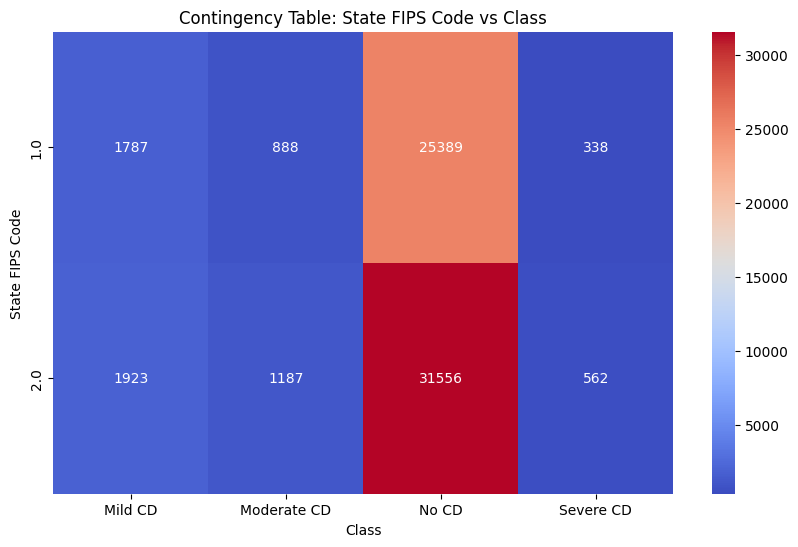

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Assuming df is your DataFrame containing the data

# Create a contingency table between the state FIPS codes and the "Class" column
contingency_table = pd.crosstab(df['SEXVAR'], df['Class'])

# Perform chi-square test of independence
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calculate Cramer's V coefficient
n = contingency_table.sum().sum()
phi2 = chi2 / n
r, k = contingency_table.shape
cramers_v = np.sqrt(phi2 / min((k-1), (r-1)))

print(f"Cramer's V coefficient: {cramers_v}")

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Contingency Table: State FIPS Code vs Class')
plt.xlabel('Class')
plt.ylabel('State FIPS Code')
plt.show()


Cramer's V coefficient for the binary classification: 0.002945765106357978


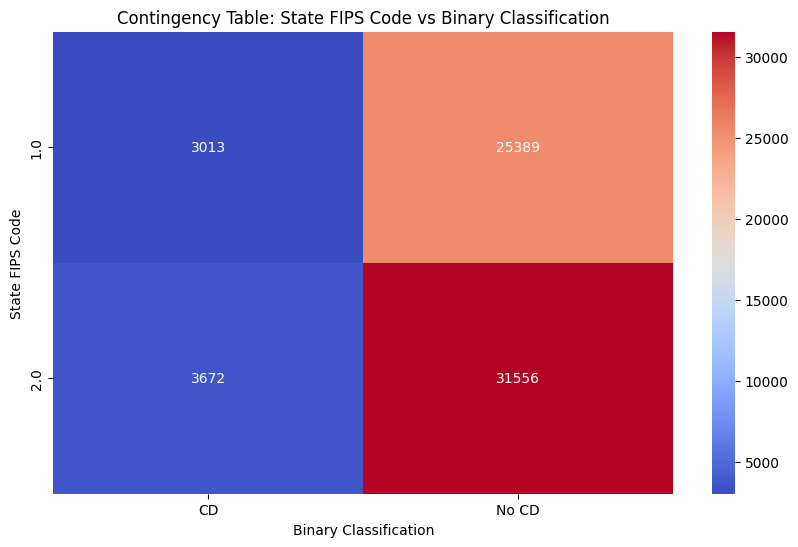

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Assuming df is your DataFrame containing the data

# Create a binary column for CD classification
df['Binary_Classification'] = df['Class'].apply(lambda x: 'CD' if x in ['Mild CD', 'Moderate CD', 'Severe CD'] else 'No CD')

# Create a contingency table between the state FIPS codes and the binary classification
contingency_table_binary = pd.crosstab(df['SEXVAR'], df['Binary_Classification'])

# Perform chi-square test of independence
chi2_binary, p_binary, _, _ = chi2_contingency(contingency_table_binary)

# Calculate Cramer's V coefficient for the binary classification
n_binary = contingency_table_binary.sum().sum()
phi2_binary = chi2_binary / n_binary
r_binary, k_binary = contingency_table_binary.shape
cramers_v_binary = np.sqrt(phi2_binary / min((k_binary-1), (r_binary-1)))

print(f"Cramer's V coefficient for the binary classification: {cramers_v_binary}")

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table_binary, annot=True, cmap='coolwarm', fmt='d')
plt.title('Contingency Table: State FIPS Code vs Binary Classification')
plt.xlabel('Binary Classification')
plt.ylabel('State FIPS Code')
plt.show()


In [29]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2, pvalue, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [30]:
#@title Function for binary variable exploration
def explore_binary(df, feature, include_refused=False):
  print(f'There are {df[feature].isna().sum()} missing values, {np.sum(df[feature]==7)} not sure, {np.sum(df[feature]==9)} refused')
  if np.sum(~df[feature].isna()) == 0:
    print("No valid information")
  else:
    subdf = df[[feature, 'Class']]
    subdf['Binary Classification'] = subdf['Class'].replace({'Mild CD':'CD', 'Moderate CD':'CD', 'Severe CD':'CD'})
    if not include_refused:
      subdf = subdf[(subdf[feature] == 1) | (subdf[feature] == 2)]
      subdf[feature] = subdf[feature].replace({1:'Yes', 2: 'No'})

      desired_order = ['Mild CD', 'Moderate CD', 'Severe CD']
      grouped = subdf.groupby([feature, 'Class']).size().unstack()
      grouped = grouped[desired_order]
      frequencies = grouped.div(grouped.sum(axis=1), axis=0)

      desired_order2 = ['CD', 'No CD']
      grouped2 = subdf.groupby([feature, 'Binary Classification']).size().unstack()
      grouped2 = grouped2[desired_order2]
      frequencies2 = grouped2.div(grouped2.sum(axis=1), axis=0)

      idx_order = ['Yes', 'No']
      frequencies.reindex(idx_order)
      frequencies2.reindex(idx_order)

      fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

      frequencies.plot(kind='bar', width=0.35, ax=axes[0])
      axes[0].set_xlabel(f'{feature}', fontsize=12)
      axes[0].set_ylabel('Distribution', fontsize=12)
      axes[0].set_title(f'Distribution of CD Classes by {feature}', fontsize=14)
      axes[0].legend(title=f'{feature}', labels=desired_order, loc='upper right')
      axes[0].set_xticklabels(idx_order, rotation=0)

      frequencies2.plot(kind='bar', width=0.35, ax=axes[1])
      axes[1].set_xlabel(f'{feature}', fontsize=12)
      axes[1].set_ylabel('Distribution', fontsize=12)
      axes[1].set_title(f'Binary CD by {feature}', fontsize=14)
      axes[1].legend(title=f'{feature}', labels=desired_order2, loc='upper right')
      axes[1].set_xticklabels(idx_order, rotation=0)

      # Show plot
      plt.tight_layout()
      plt.show()

      cv1 = cramers_v(subdf[~(subdf['Class']=='No CD')][feature], subdf[~(subdf['Class']=='No CD')]['Class'])
      print(f'Cramers V for multi-class classification is: {cv1}')

      cv2 = cramers_v(subdf[feature], subdf['Binary Classification'])
      print(f'Cramers V for binary classification is: {cv2}')

    else:
      subdf = subdf[(subdf[feature] == 1) | (subdf[feature] == 2)| (subdf[feature] == 7)| (subdf[feature] == 9)]
      subdf[feature] = subdf[feature].replace({1:'Yes', 2: 'No', 7: 'Not Sure', 9: 'Refused'})

      desired_order = ['Mild CD', 'Moderate CD', 'Severe CD']
      grouped = subdf.groupby([feature, 'Class']).size().unstack()
      grouped.fillna(0, inplace=True)
      grouped = grouped[desired_order]
      frequencies = grouped.div(grouped.sum(axis=1), axis=0)

      desired_order2 = ['CD', 'No CD']
      grouped2 = subdf.groupby([feature, 'Binary Classification']).size().unstack()
      grouped2 = grouped2[desired_order2]
      frequencies2 = grouped2.div(grouped2.sum(axis=1), axis=0)

      idx_order = ['Yes', 'No', 'Not Sure', 'Refused']
      frequencies.reindex(idx_order)
      frequencies2.reindex(idx_order)

      fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

      frequencies.plot(kind='bar', width=0.35, ax=axes[0])
      axes[0].set_xlabel(f'{feature}', fontsize=12)
      axes[0].set_ylabel('Distribution', fontsize=12)
      axes[0].set_title(f'Distribution of CD Classes by {feature}', fontsize=14)
      axes[0].legend(title=f'{feature}', labels=desired_order, loc='upper right')
      axes[0].set_xticklabels(idx_order, rotation=0)

      frequencies2.plot(kind='bar', width=0.35, ax=axes[1])
      axes[1].set_xlabel(f'{feature}', fontsize=12)
      axes[1].set_ylabel('Distribution', fontsize=12)
      axes[1].set_title(f'Binary CD by {feature}', fontsize=14)
      axes[1].legend(title=f'{feature}', labels=desired_order2, loc='upper right')
      axes[1].set_xticklabels(idx_order, rotation=0)

      # Show plot
      plt.tight_layout()
      plt.show()

      cv1 = cramers_v(subdf[~(subdf['Class']=='No CD')][feature], subdf[~(subdf['Class']=='No CD')]['Class'])
      print(f'Cramers V for multi-class classification is: {cv1}')

      cv2 = cramers_v(subdf[feature], subdf['Binary Classification'])
      print(f'Cramers V for binary classification is: {cv2}')

There are 0 missing values, 0 not sure, 0 refused


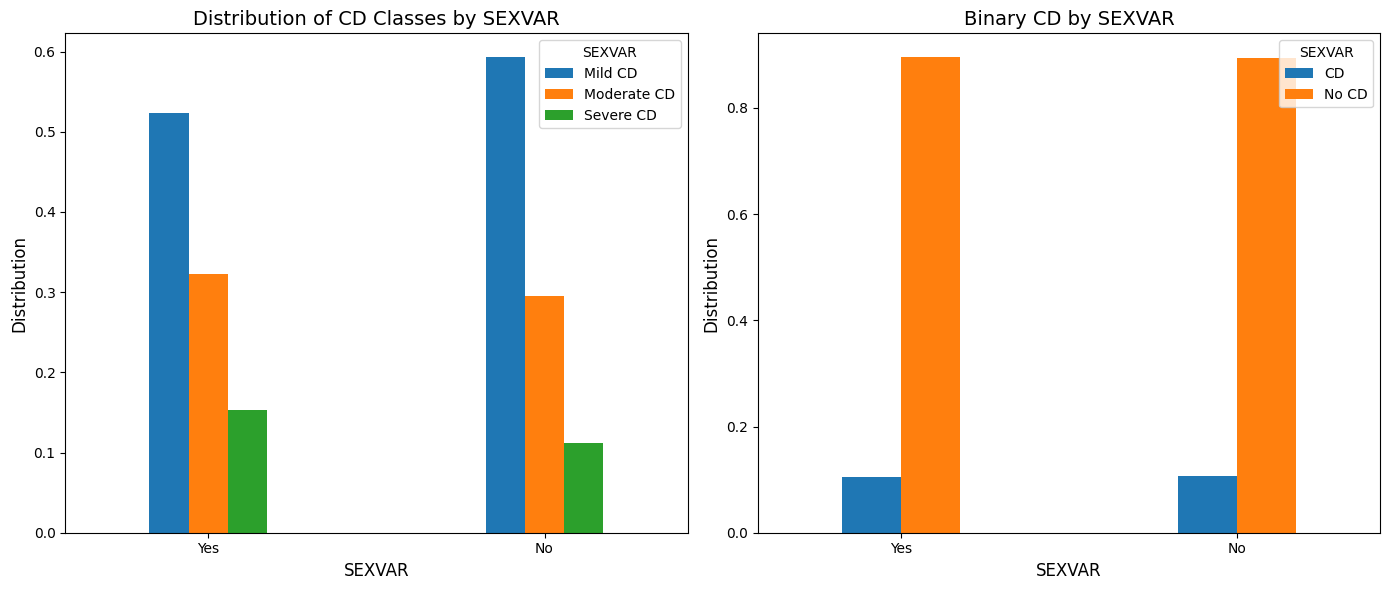

Cramers V for multi-class classification is: 0.07464146803413708
Cramers V for binary classification is: 0.0


In [31]:
explore_binary(df, 'SEXVAR', include_refused=False)

There are 0 missing values, 126 not sure, 36 refused


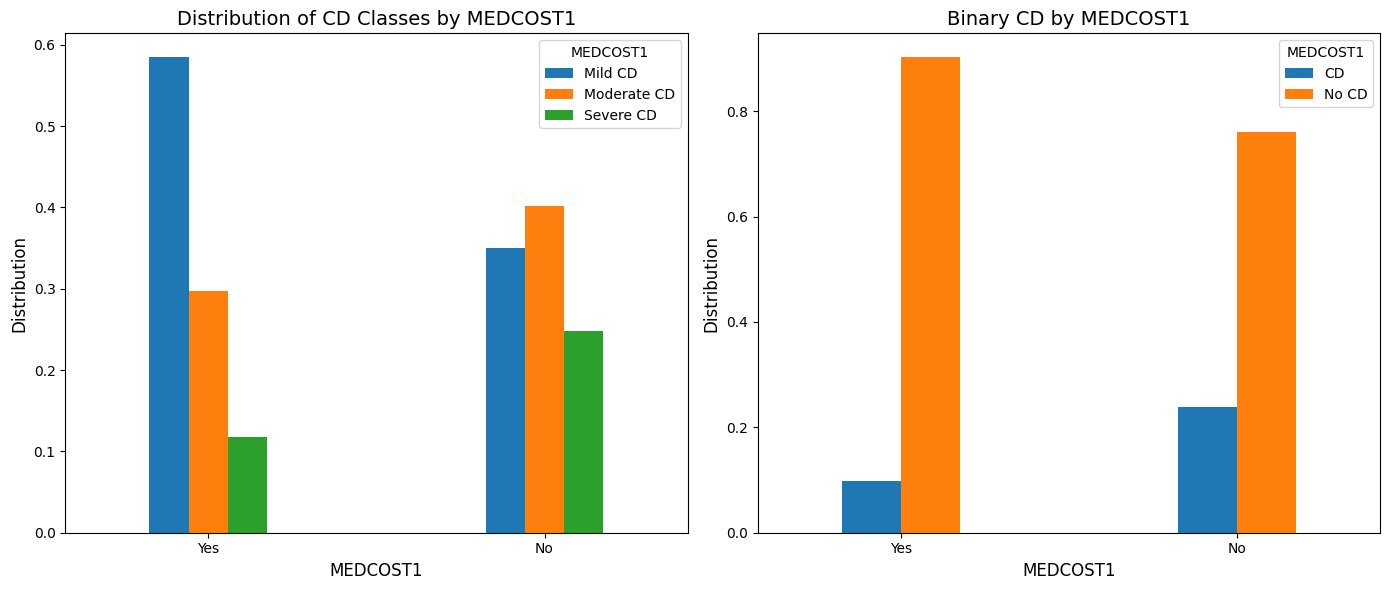

Cramers V for multi-class classification is: 0.16518860946267167
Cramers V for binary classification is: 0.10359409181345736
There are 0 missing values, 140 not sure, 45 refused


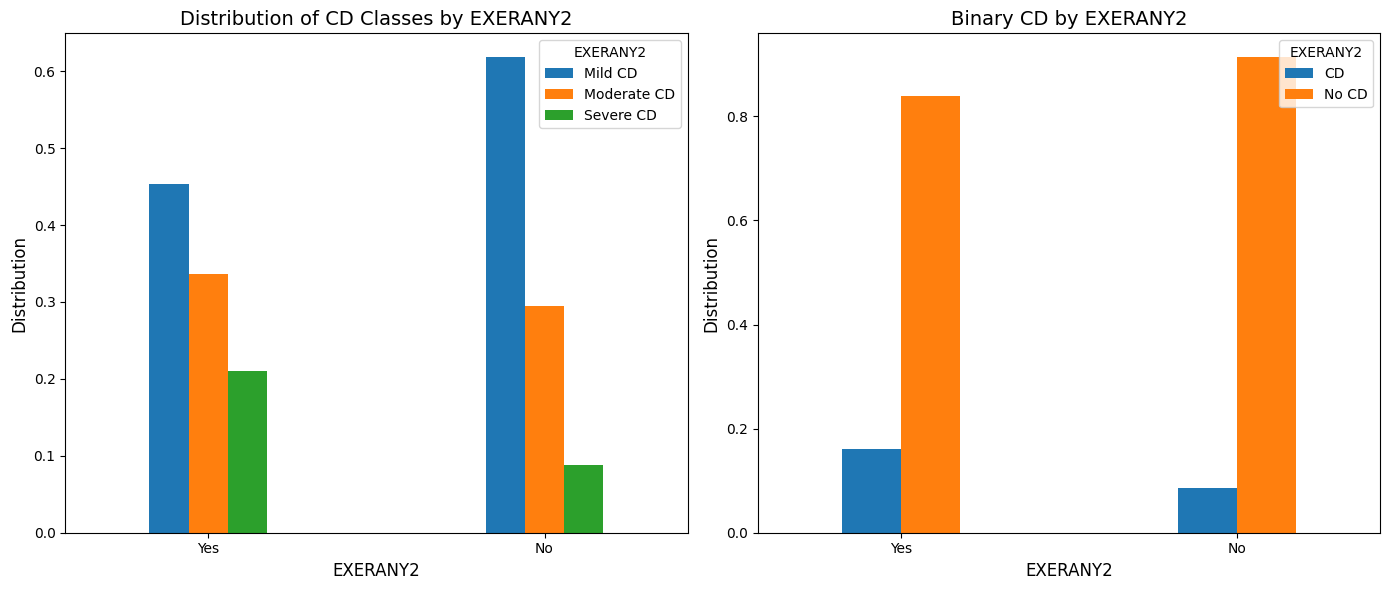

Cramers V for multi-class classification is: 0.197714399911517
Cramers V for binary classification is: 0.10456950090555286
There are 0 missing values, 402 not sure, 31 refused


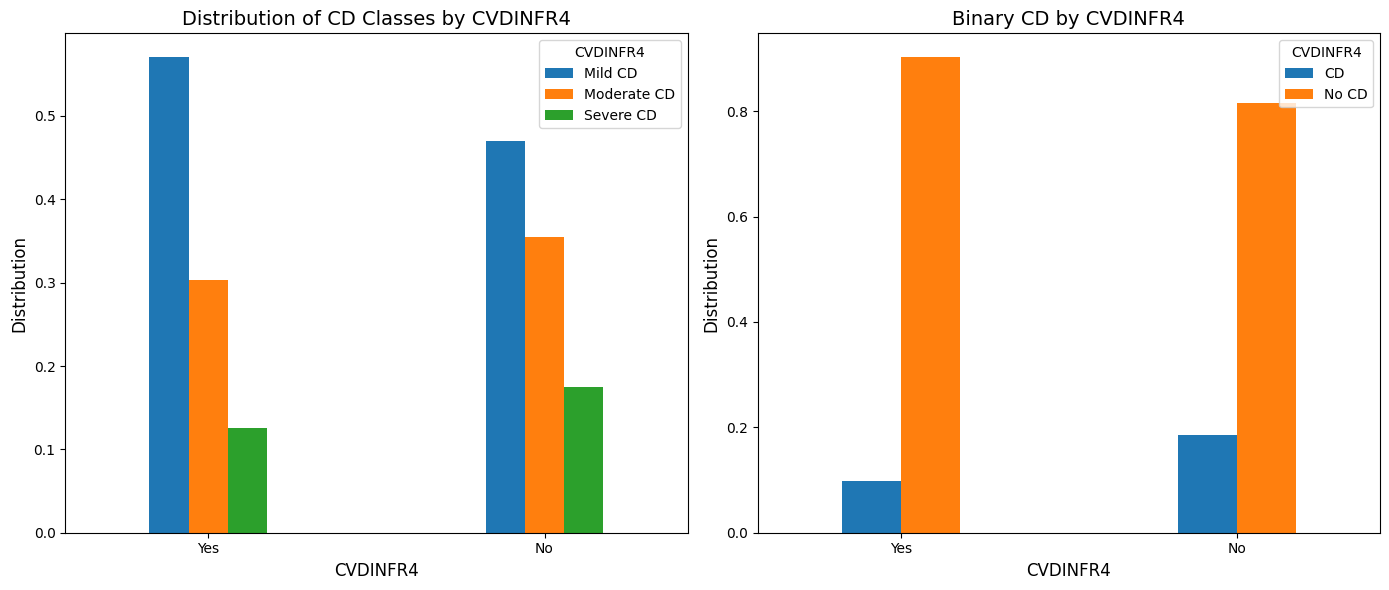

Cramers V for multi-class classification is: 0.0712091319462386
Cramers V for binary classification is: 0.07653635331043357
There are 0 missing values, 704 not sure, 36 refused


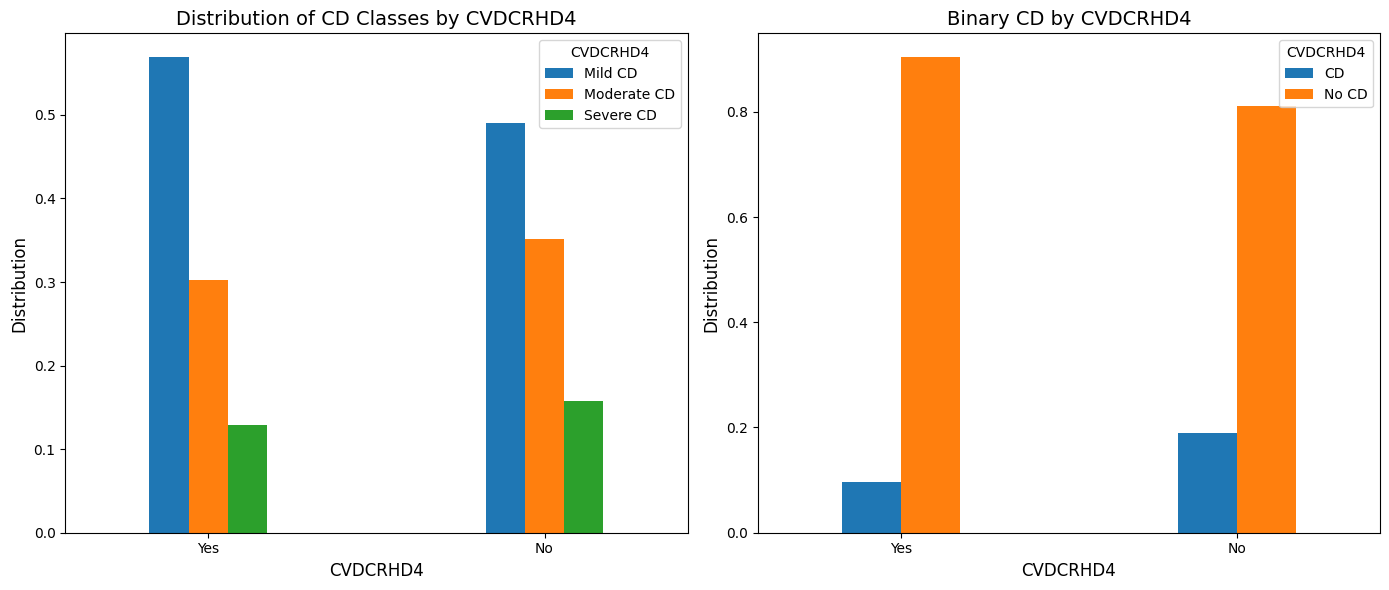

Cramers V for multi-class classification is: 0.054896471851409265
Cramers V for binary classification is: 0.08495968768636508
There are 0 missing values, 188 not sure, 18 refused


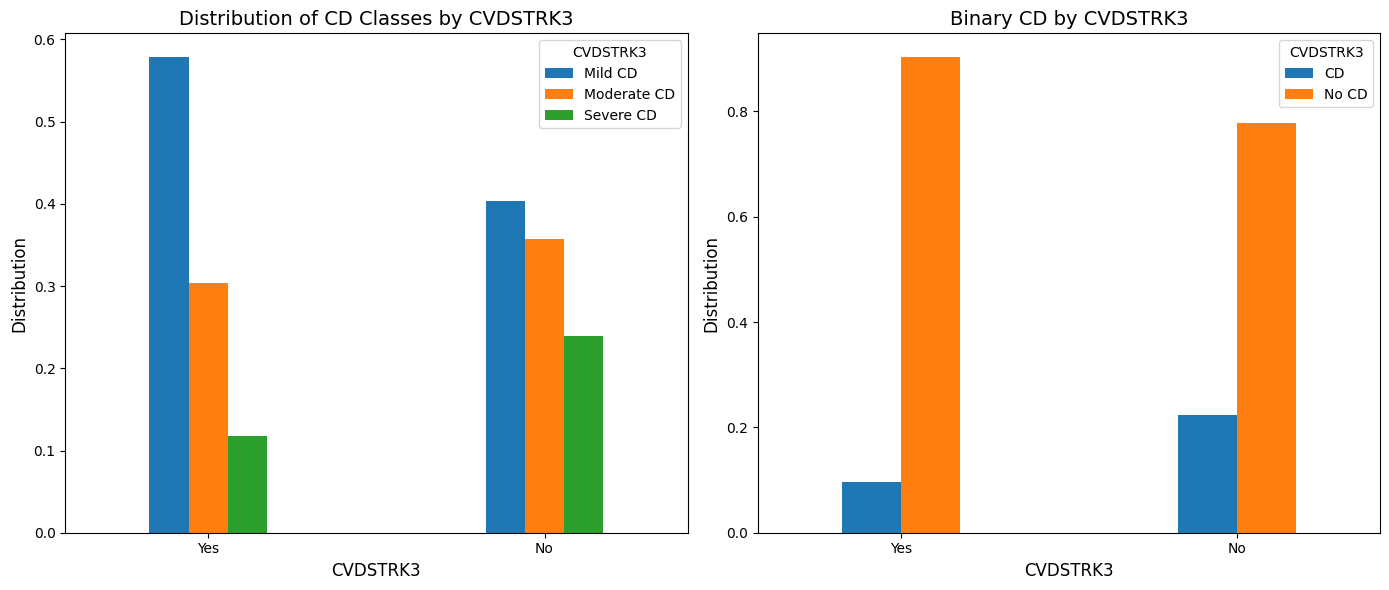

Cramers V for multi-class classification is: 0.13766425418996453
Cramers V for binary classification is: 0.09662068689139486
There are 0 missing values, 222 not sure, 17 refused


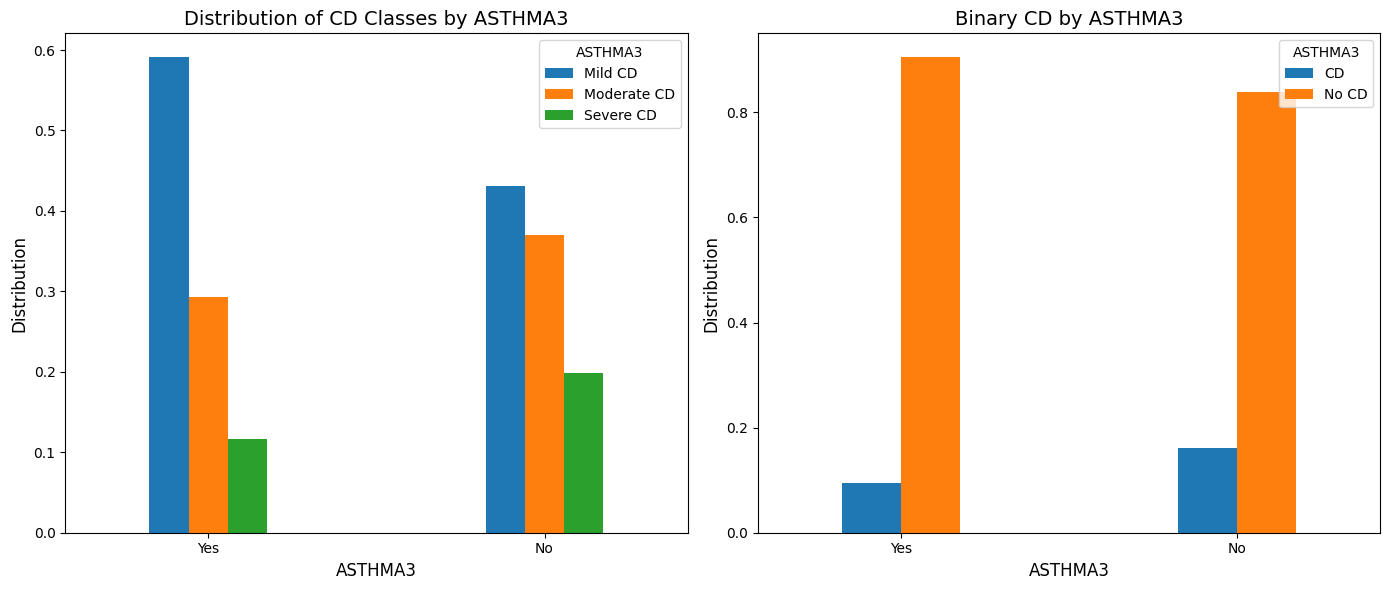

Cramers V for multi-class classification is: 0.14127350079311538
Cramers V for binary classification is: 0.07670316933952741
There are 0 missing values, 541 not sure, 21 refused


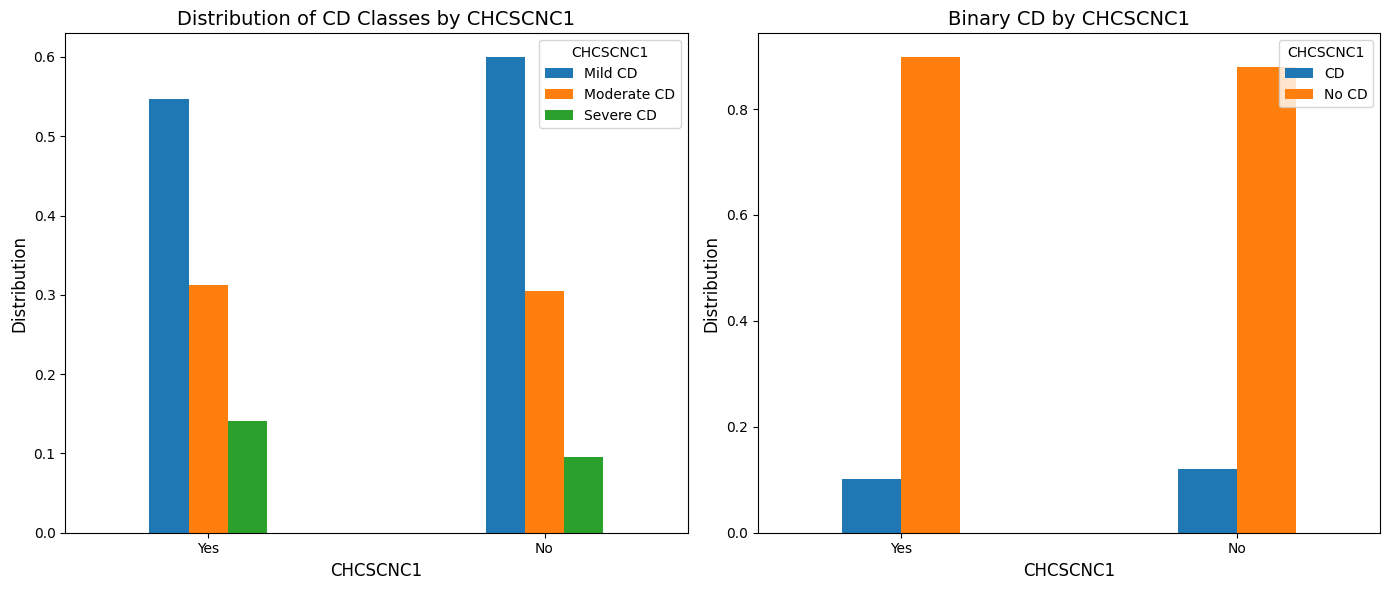

Cramers V for multi-class classification is: 0.04795543678046901
Cramers V for binary classification is: 0.020042439079110047
There are 0 missing values, 411 not sure, 36 refused


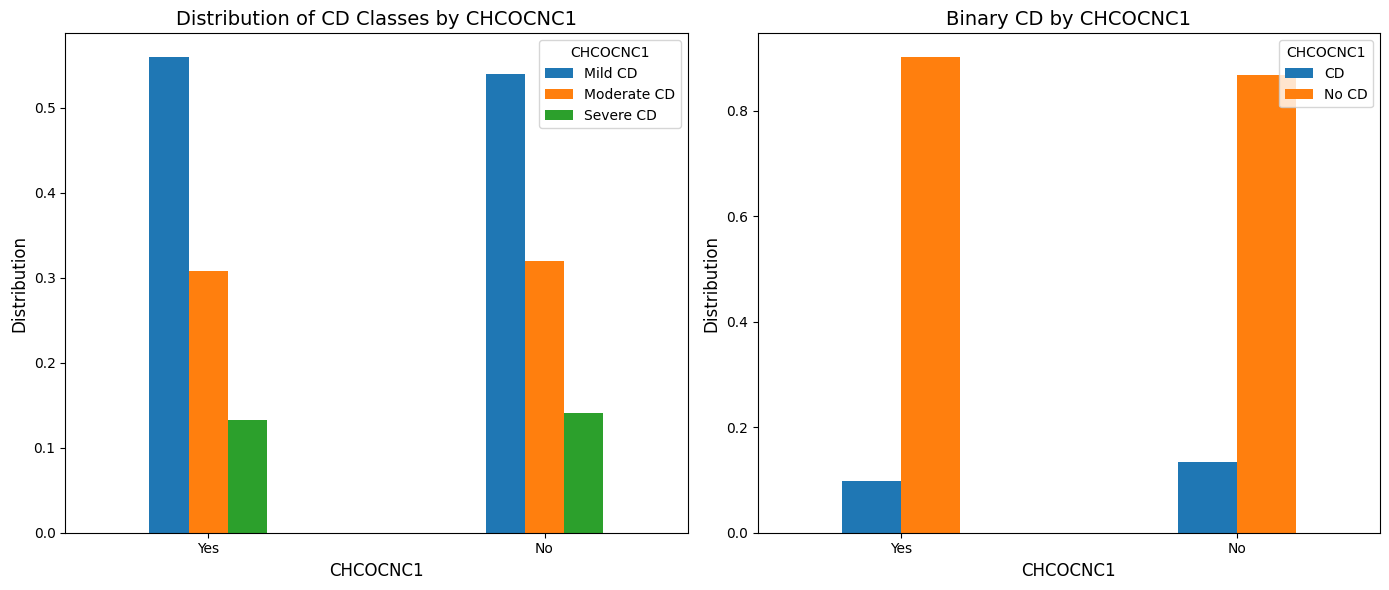

Cramers V for multi-class classification is: 0.0
Cramers V for binary classification is: 0.041770532475801724
There are 0 missing values, 254 not sure, 18 refused


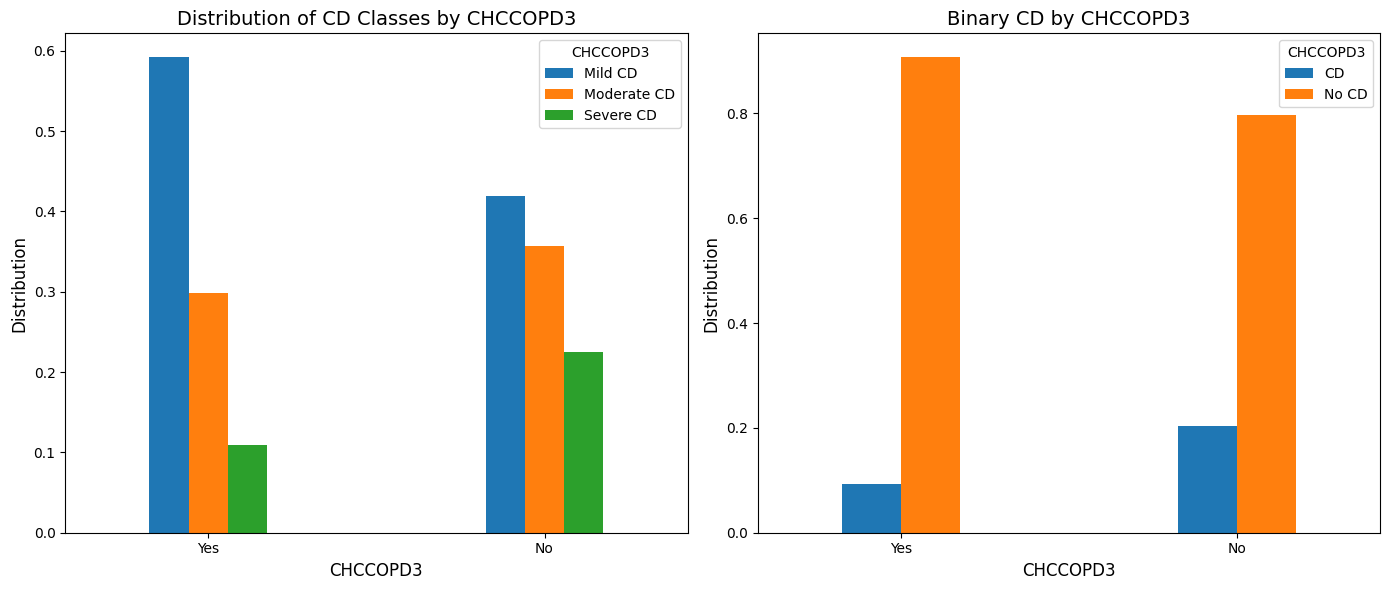

Cramers V for multi-class classification is: 0.1637274813333649
Cramers V for binary classification is: 0.11117222076237494
There are 0 missing values, 226 not sure, 70 refused


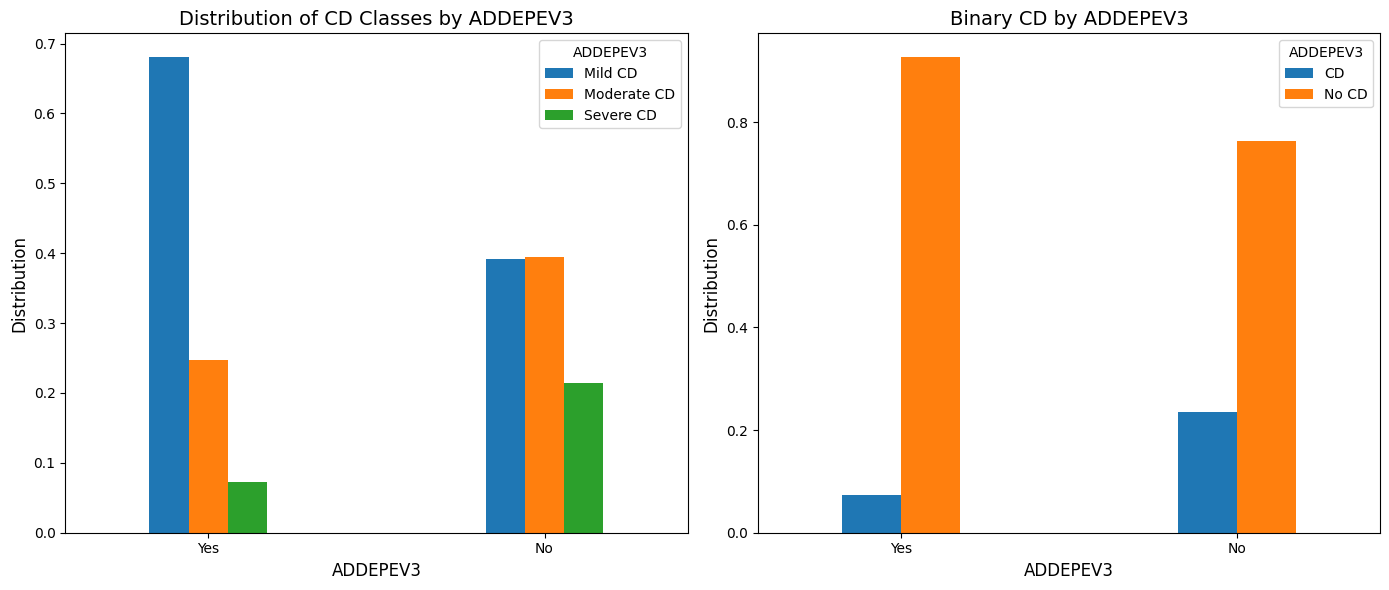

Cramers V for multi-class classification is: 0.30072245521387014
Cramers V for binary classification is: 0.2093664162478437
There are 0 missing values, 266 not sure, 31 refused


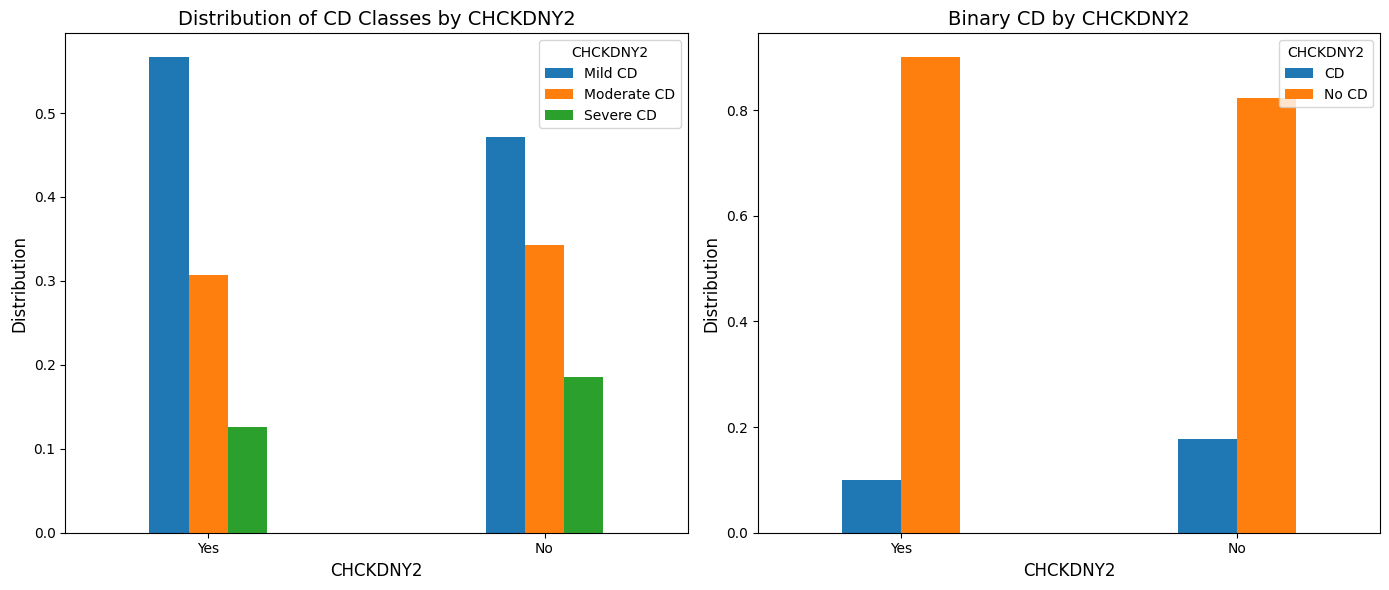

Cramers V for multi-class classification is: 0.06444839440297534
Cramers V for binary classification is: 0.06138075851592452
There are 0 missing values, 310 not sure, 27 refused


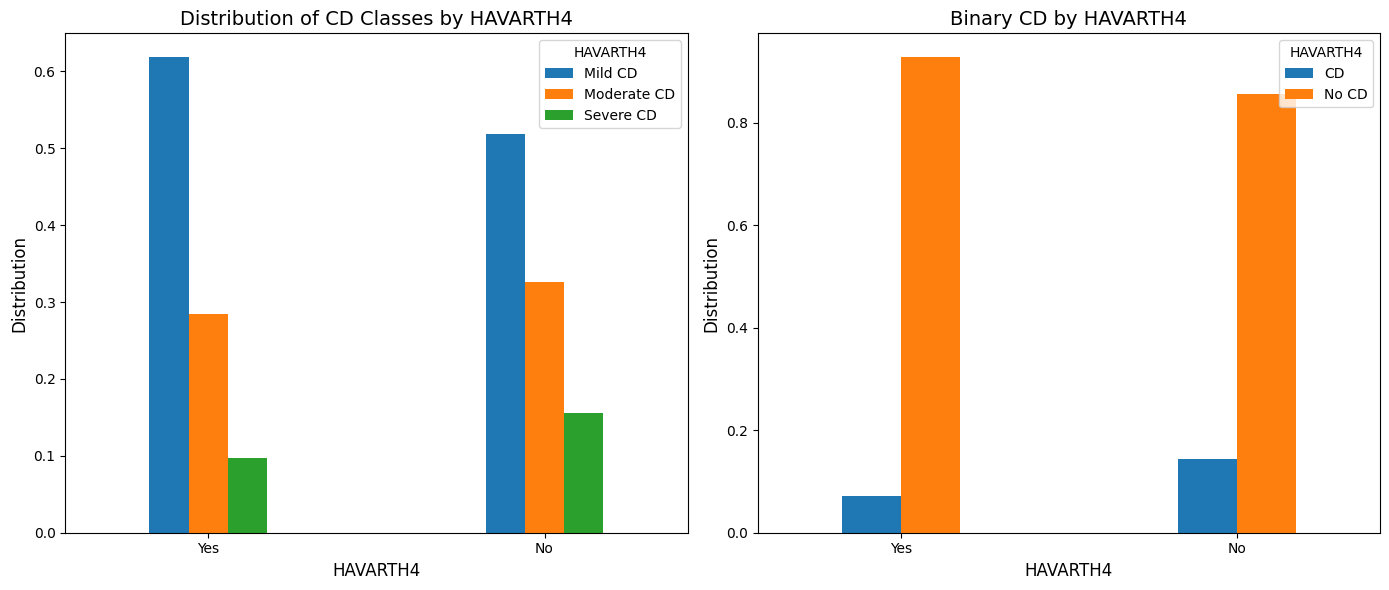

Cramers V for multi-class classification is: 0.10624250379197465
Cramers V for binary classification is: 0.11563420215119237
There are 0 missing values, 32 not sure, 107 refused


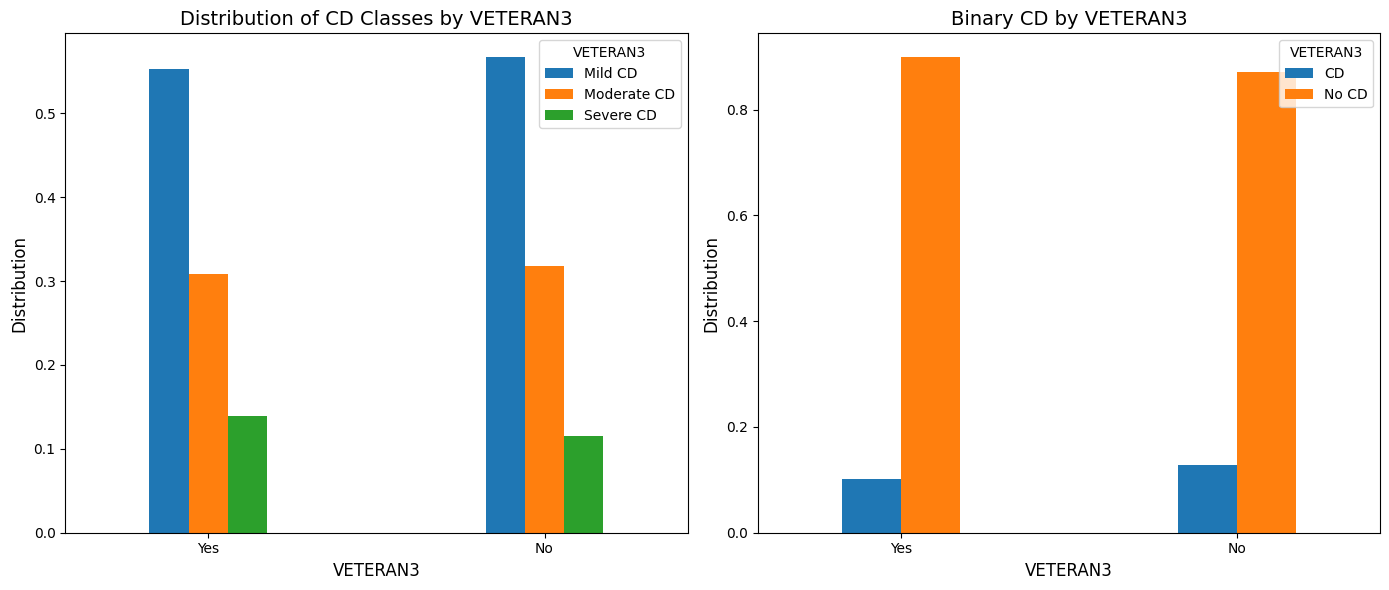

Cramers V for multi-class classification is: 0.021400168286978136
Cramers V for binary classification is: 0.03263088639061645


In [32]:
# Define the DataFrame name 'df' and import necessary libraries

# Call explore_binary for each column
explore_binary(df, 'MEDCOST1', include_refused=False)
explore_binary(df, 'EXERANY2', include_refused=False)
explore_binary(df, 'CVDINFR4', include_refused=False)
explore_binary(df, 'CVDCRHD4', include_refused=False)
explore_binary(df, 'CVDSTRK3', include_refused=False)
explore_binary(df, 'ASTHMA3', include_refused=False)
explore_binary(df, 'CHCSCNC1', include_refused=False)
explore_binary(df, 'CHCOCNC1', include_refused=False)
explore_binary(df, 'CHCCOPD3', include_refused=False)
explore_binary(df, 'ADDEPEV3', include_refused=False)
explore_binary(df, 'CHCKDNY2', include_refused=False)
explore_binary(df, 'HAVARTH4', include_refused=False)
explore_binary(df, 'VETERAN3', include_refused=False)


In [33]:
#@title Function for categorical variable exploration
# mapping = {1:'Always', 2:"Usually",..., 7:"Not Sure", 9:"Refused"}
def explore_cat(df, feature, mapping, include_refused=False):
  subdf = df[[feature, 'Class']]
  subdf[feature] = subdf[feature].replace(mapping)
  print(f'There are {df[feature].isna().sum()} missing values, {np.sum(subdf[feature]=="Not Sure")} not sure values, {np.sum(subdf[feature]=="Refused")} refused values')
  if np.sum(~df[feature].isna()) == 0:
    print("No valid information")

  else:
    subdf.dropna(subset = [feature], inplace=True)
    subdf['Binary Classification'] = subdf['Class'].replace({'Mild CD':'CD', 'Moderate CD':'CD', 'Severe CD':'CD'})

    if not include_refused:
      subdf = subdf[~((subdf[feature] == 'Not Sure') | (subdf[feature] == 'Refused'))]

      desired_order = ['Mild CD', 'Moderate CD', 'Severe CD']
      grouped = subdf.groupby([feature, 'Class']).size().unstack()
      grouped = grouped[desired_order]
      frequencies = grouped.div(grouped.sum(axis=1), axis=0)

      desired_order2 = ['CD', 'No CD']
      grouped2 = subdf.groupby([feature, 'Binary Classification']).size().unstack()
      grouped2 = grouped2[desired_order2]
      frequencies2 = grouped2.div(grouped2.sum(axis=1), axis=0)

      idx_order = list(mapping.values())[:-2]
      frequencies.reindex(idx_order)
      frequencies2.reindex(idx_order)

      fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

      frequencies.plot(kind='bar', width=0.35, ax=axes[0])
      axes[0].set_xlabel(f'{feature}', fontsize=12)
      axes[0].set_ylabel('Distribution', fontsize=12)
      axes[0].set_title(f'Distribution of CD Classes by {feature}', fontsize=14)
      axes[0].legend(title=f'{feature}', labels=desired_order, loc='upper right')
      axes[0].set_xticklabels(idx_order, rotation=0)

      frequencies2.plot(kind='bar', width=0.35, ax=axes[1])
      axes[1].set_xlabel(f'{feature}', fontsize=12)
      axes[1].set_ylabel('Distribution', fontsize=12)
      axes[1].set_title(f'Binary CD by {feature}', fontsize=14)
      axes[1].legend(title=f'{feature}', labels=desired_order2, loc='upper right')
      axes[1].set_xticklabels(idx_order, rotation=0)

      # Show plot
      plt.tight_layout()
      plt.show()

      cv1 = cramers_v(subdf[~(subdf['Class']=='No CD')][feature], subdf[~(subdf['Class']=='No CD')]['Class'])
      print(f'Cramers V for multi-class classification is: {cv1}')

      cv2 = cramers_v(subdf[feature], subdf['Binary Classification'])
      print(f'Cramers V for binary classification is: {cv2}')

    else:
      desired_order = ['Mild CD', 'Moderate CD', 'Severe CD']
      grouped = subdf.groupby([feature, 'Class']).size().unstack()
      grouped.fillna(0, inplace=True)
      grouped = grouped[desired_order]
      frequencies = grouped.div(grouped.sum(axis=1), axis=0)

      desired_order2 = ['CD', 'No CD']
      grouped2 = subdf.groupby([feature, 'Binary Classification']).size().unstack()
      grouped2 = grouped2[desired_order2]
      frequencies2 = grouped2.div(grouped2.sum(axis=1), axis=0)

      idx_order = list(mapping.values())
      frequencies.reindex(idx_order)
      frequencies2.reindex(idx_order)

      fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

      frequencies.plot(kind='bar', width=0.35, ax=axes[0])
      axes[0].set_xlabel(f'{feature}', fontsize=12)
      axes[0].set_ylabel('Distribution', fontsize=12)
      axes[0].set_title(f'Distribution of CD Classes by {feature}', fontsize=14)
      axes[0].legend(title=f'{feature}', labels=desired_order, loc='upper right')
      axes[0].set_xticklabels(idx_order, rotation=0)

      frequencies2.plot(kind='bar', width=0.35, ax=axes[1])
      axes[1].set_xlabel(f'{feature}', fontsize=12)
      axes[1].set_ylabel('Distribution', fontsize=12)
      axes[1].set_title(f'Binary CD by {feature}', fontsize=14)
      axes[1].legend(title=f'{feature}', labels=desired_order2, loc='upper right')
      axes[1].set_xticklabels(idx_order, rotation=0)

      # Show plot
      plt.tight_layout()
      plt.show()

      cv1 = cramers_v(subdf[~(subdf['Class']=='No CD')][feature], subdf[~(subdf['Class']=='No CD')]['Class'])
      print(f'Cramers V for multi-class classification is: {cv1}')

      cv2 = cramers_v(subdf[feature], subdf['Binary Classification'])
      print(f'Cramers V for binary classification is: {cv2}')

There are 0 missing values, 0 not sure values, 58 refused values


ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of labels (5).

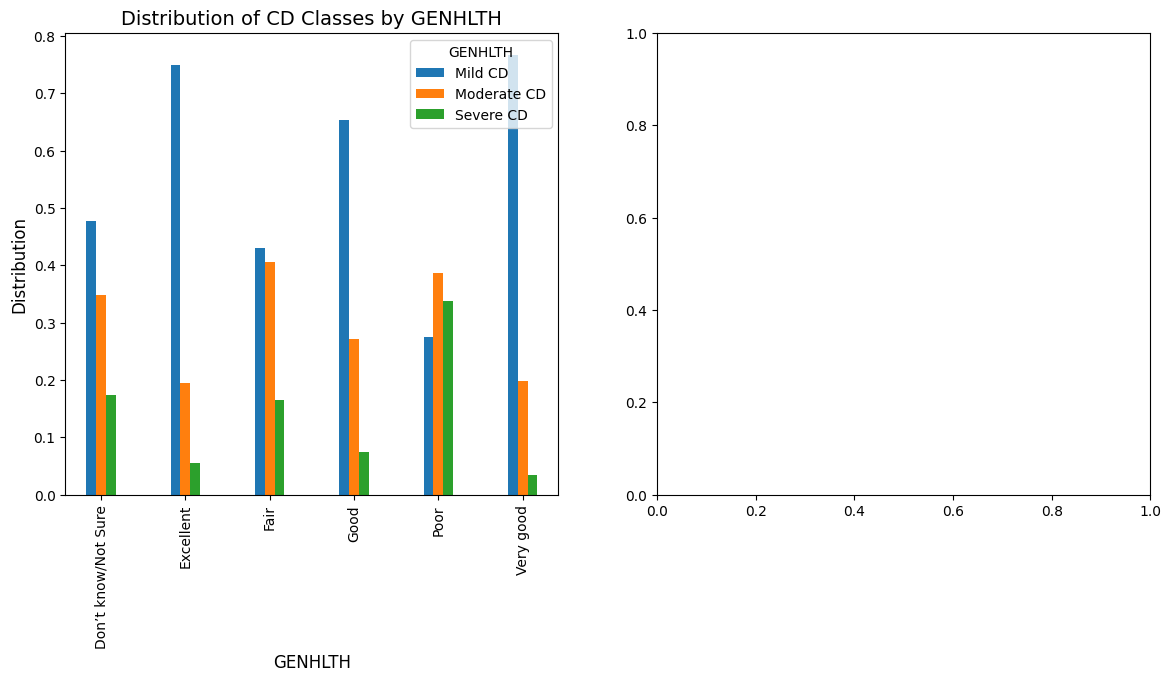

In [34]:
# mapping = {1:"Gay", 2: "Straight", 3: "Bi", 4:"Others", 7: "Not Sure", 9: "Refused"}

# Mapping for General Health
mapping_gen_health = {
    1: 'Excellent',
    2: 'Very good',
    3: 'Good',
    4: 'Fair',
    5: 'Poor',
    7: 'Don’t know/Not Sure',
    9: 'Refused'
}

feature_gen_health = 'GENHLTH'
explore_cat(df_full, feature_gen_health, mapping_gen_health, include_refused=False)

In [ ]:
# Mapping for Marital Status
mapping_marital = {
    1: 'Married',
    2: 'Divorced',
    3: 'Widowed',
    4: 'Separated',
    5: 'Never married',
    6: 'A member of an unmarried couple',
    9: 'Refused',
    'BLANK': 'Not asked or Missing'
}

feature_marital = 'MARITAL'

# Mapping for Education Level
mapping_education = {
    1: 'Never attended school or only kindergarten',
    2: 'Grades 1 through 8 (Elementary)',
    3: 'Grades 9 through 11 (Some high school)',
    4: 'Grade 12 or GED (High school graduate)',
    5: 'College 1 year to 3 years (Some college or technical school)',
    6: 'College 4 years or more (College graduate)',
    9: 'Refused',
    'BLANK': 'Not asked or Missing'
}

feature_education = 'EDUCA'

# Mapping for Own or Rent Home
mapping_home = {
    1: 'Own',
    2: 'Rent',
    3: 'Other arrangement',
    7: 'Don’t know/Not Sure',
    9: 'Refused',
    'BLANK': 'Not asked or Missing'
}

feature_home = 'RENTHOM1'
explore_cat(df_full, feature_marital, mapping_marital, include_refused=False)
explore_cat(df_full, feature_education, mapping_education, include_refused=False)
explore_cat(df_full, feature_home, mapping_home, include_refused=False)


In [ ]:
# Mapping for Primary Source of Health Insurance
mapping_health_insurance = {
    1: 'Plan purchased through an employer or union',
    2: 'Private nongovernmental plan purchased by you or another family member',
    3: 'Medicare',
    4: 'Medigap',
    5: 'Medicaid',
    6: 'Children\'s Health Insurance Program (CHIP)',
    7: 'Military related health care: TRICARE (CHAMPUS) / VA health care / CHAMP-VA',
    8: 'Indian Health Service',
    9: 'State sponsored health plan',
    10: 'Other government program',
    88: 'No coverage of any type',
    77: 'Don’t know/Not Sure',
    99: 'Refused',
    'BLANK': 'Not asked or Missing'
}

feature_health_insurance = 'PRIMINSR'

# Mapping for Having a Personal Health Care Provider
mapping_personal_provider = {
    1: 'Yes, only one',
    2: 'More than one',
    3: 'No',
    7: 'Don’t know/Not Sure',
    9: 'Refused',
    'BLANK': 'Not asked or Missing'
}
# Mapping for Length of time since last routine checkup
mapping_checkup = {
    1: 'Within past year (anytime less than 12 months ago)',
    2: 'Within past 2 years (1 year but less than 2 years ago)',
    3: 'Within past 5 years (2 years but less than 5 years ago)',
    4: '5 or more years ago',
    7: 'Don’t know/Not sure',
    8: 'Never',
    9: 'Refused',
    'BLANK': 'Not asked or Missing'
}

feature_checkup = 'CHECKUP1'

feature_personal_provider = 'PERSDOC3'
explore_cat(df_full, feature_checkup, mapping_checkup, include_refused=False)
explore_cat(df_full, feature_personal_provider, mapping_personal_provider, include_refused=False)

In [ ]:
mapping = {
    1: 'Yes',
    2: 'Yes, but female told only during pregnancy',
    3: 'No',
    4: 'No, pre-diabetes or borderline diabetes',
    7: 'Don’t know/Not Sure',
    9: 'Refused',
    'BLANK': 'Not asked or Missing'
}

feature = 'DIABETE4'

explore_cat(df_full, feature, mapping, include_refused=False)

In [ ]:
mapping = {
    1: 'Male—Go to CP.06, PVTRESD3',
    2: 'Female—Go to CP.06, PVTRESD3',
    3: 'Nonbinary—Insert Sex at Birth module or Terminate Phone Call',
    7: 'Don’t know/Not Sure—Insert Sex at Birth module or Terminate Phone Call',
    9: 'Refused—Insert Sex at Birth module or Terminate Phone Call'
}

feature = 'CELLSEX1'
explore_cat(df_full, feature, mapping, include_refused=False)

In [ ]:
mapping = {
    0: 'Number of adult men in the household',
    1: 'Number of adult men in the household',
    2: 'Number of adult men in the household',
    3: 'Number of adult men in the household',
    4: 'Number of adult men in the household',
    5: 'Number of adult men in the household',
    6: '6 or more',
    99: '6 or more'
}

feature = 'NUMWOMEN'
explore_cat(df_full, feature, mapping, include_refused=False)

In [ ]:
mapping = {
    1: 'Alabama',
    2: 'Alaska',
    4: 'Arizona',
    5: 'Arkansas',
    6: 'California',
    8: 'Colorado',
    9: 'Connecticut',
    10: 'Delaware',
    11: 'District of Columbia',
    12: 'Florida',
    13: 'Georgia',
    15: 'Hawaii',
    16: 'Idaho',
    17: 'Illinois',
    18: 'Indiana',
    19: 'Iowa',
    20: 'Kansas',
    21: 'Kentucky',
    22: 'Louisiana',
    23: 'Maine',
    24: 'Maryland',
    25: 'Massachusetts',
    26: 'Michigan',
    27: 'Minnesota',
    28: 'Mississippi',
    29: 'Missouri',
    30: 'Montana',
    31: 'Nebraska',
    32: 'Nevada',
    33: 'New Hampshire',
    34: 'New Jersey',
    35: 'New Mexico',
    36: 'New York',
    37: 'North Carolina',
    38: 'North Dakota',
    39: 'Ohio',
    40: 'Oklahoma',
    41: 'Oregon',
    42: 'Pennsylvania',
    44: 'Rhode Island',
    45: 'South Carolina',
    46: 'South Dakota',
    47: 'Tennessee',
    48: 'Texas',
    49: 'Utah',
    50: 'Vermont',
    51: 'Virginia',
    53: 'Washington',
    54: 'West Virginia',
    55: 'Wisconsin',
    56: 'Wyoming',
    66: 'Guam',
    72: 'Puerto Rico',
    78: 'Virgin Islands'
}
feature = '_STATE'

explore_cat(df_full, feature, mapping, include_refused=False)

In [ ]:
# mapping = {1:"Gay", 2: "Straight", 3: "Bi", 4:"Others", 7: "Not Sure", 9: "Refused"}

mapping = {
    1100: 'Completed Interview',
    1200: 'Partial Complete Interview'
}

# mapping = {1:"Always", 2: "Usually", 3: "Sometimes", 4:"Rarely", 5:"Never", 7: "Not Sure", 9: "Refused"}
feature = 'DISPCODE'

explore_cat(df_full, feature, mapping, include_refused=False)

In [ ]:
mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
# mapping = {1:"Always", 2: "Usually", 3: "Sometimes", 4:"Rarely", 5:"Never", 7: "Not Sure", 9: "Refused"}
feature = 'IMONTH'
explore_cat(df_full, feature, mapping, include_refused=False)


In [ ]:
#@title Function for continuous variable exploration
def explore_cts(df, feature, none=88, not_sure=77, refused=99):
  subdf = df[[feature, 'Class']]
  print(f'There are {subdf[feature].isna().sum()} missing values, {np.sum(subdf[feature]==not_sure)} not sure values, {np.sum(subdf[feature]==refused)} refused values')

  if np.sum(~subdf[feature].isna()) == 0:
    print("No valid information")

  else:
    subdf.dropna(subset=[feature], inplace=True)
    subdf = subdf[~((subdf[feature]==not_sure) | (subdf[feature]==refused))]
    subdf[feature] = subdf[feature].replace(none, 0)

    desired_order = ['Mild CD', 'Moderate CD', 'Severe CD']
    desired_order2 = ['CD', 'No CD']

    subdf['Binary Classification'] = subdf['Class'].replace({'Mild CD':'CD', 'Moderate CD':'CD', 'Severe CD':'CD'})

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    sns.kdeplot(data=subdf[(subdf['Class']!='No CD')], x=feature, hue='Class', hue_order=desired_order,fill=True,
                common_norm=False, bw_adjust=2, ax=axes[0])
    axes[0].set_xlabel(f'{feature}', fontsize=12)
    axes[0].set_ylabel('Density', fontsize=12)
    axes[0].set_title(f'Distribution of {feature} within different CD classes', fontsize=14)
    axes[0].legend(title=f'{feature}', labels=desired_order, loc='upper right')

    sns.kdeplot(data=subdf, x=feature, hue='Binary Classification', hue_order=desired_order2,fill=True,
                common_norm=False, bw_adjust=2, ax=axes[1])
    axes[1].set_xlabel(f'{feature}', fontsize=12)
    axes[1].set_ylabel('Density', fontsize=12)
    axes[1].set_title(f'Distribution of {feature} with and without CD', fontsize=14)
    axes[1].legend(title=f'{feature}', labels=desired_order2, loc='upper right')

    plt.tight_layout()
    plt.show()

    groups = [group[feature] for name, group in subdf[(subdf['Class']!='No CD')].groupby('Class')]
    f_statistic, p_value = f_oneway(*groups)

    print("p-value for multi-class classification is:", p_value)

    groups2 = [group[feature] for name, group in subdf.groupby('Binary Classification')]
    f_statistic, p_value2 = f_oneway(*groups2)

    print("p-value for binary classification:", p_value2)



In [ ]:
feature = 'SLEPTIM1';

explore_cts(df_full, feature, none=88, not_sure=98, refused=99)

In [41]:
Filtered = ['SEXVAR', 'HHADULT', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'PRIMINSR', 'MEDCOST1', 'EXERANY2', 'LASTDEN4', 'RMVTETH4', 'CVDSTRK3', 'ASTHMA3', 'CHCCOPD3', 'ADDEPEV3', 'HAVARTH4', 'EDUCA', 'RENTHOM1', 'EMPLOY1', 'INCOME3', 'Class']
df1 = df_full[Filtered]
df1.head()

,SEXVAR,HHADULT,PHYSHLTH,MENTHLTH,POORHLTH,PRIMINSR,MEDCOST1,EXERANY2,LASTDEN4,RMVTETH4,CVDSTRK3,ASTHMA3,CHCCOPD3,ADDEPEV3,HAVARTH4,EDUCA,RENTHOM1,EMPLOY1,INCOME3,Class
0,1.0,NaN,88.0,88.0,NaN,3.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,6.0,1.0,7.0,11.0,Mild CD
1,2.0,NaN,88.0,88.0,NaN,88.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,6.0,1.0,2.0,7.0,No CD
2,1.0,NaN,4.0,77.0,4.0,3.0,2.0,1.0,1.0,8.0,2.0,2.0,2.0,1.0,1.0,6.0,1.0,7.0,9.0,Mild CD
3,1.0,NaN,88.0,88.0,NaN,3.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,6.0,1.0,7.0,99.0,No CD
4,1.0,NaN,1.0,3.0,88.0,2.0,2.0,1.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,6.0,1.0,7.0,6.0,No CD


In [37]:
for column in df1.columns:
    print(column, df1[column].unique())

COLGSEX1 [nan  2.  1.]
HHADULT [           nan 2.00000000e+00 1.00000000e+00 4.00000000e+00
 3.00000000e+00 1.00000000e+01 6.00000000e+00 9.90000000e+01
 5.00000000e+00 7.70000000e+01 9.00000000e+00 7.00000000e+00
 1.70000000e+01 1.20000000e+01 8.00000000e+00 1.60000000e+01
 1.30000000e+01 4.00000000e+01 2.20000000e+01 2.30000000e+01
 1.80000000e+01 1.40000000e+01 1.10000000e+01 5.39760535e-79
 8.80000000e+01 2.10000000e+01 5.10000000e+01 1.50000000e+01]
PHYSHLTH [88.  4.  1.  3. 10. 20. 77. 30. 14. 15.  2.  5. 25. 29.  7. 13. 99. 28.
  8. 17. 12.  6. 21. 19. 27. 26. 18. 16.  9. 11. 22. 23. 24.]
MENTHLTH [88. 77.  3.  2.  1. 30.  5. 10. 14. 12. 15. 99.  4.  8.  6. 20.  7. 29.
  9. 25. 21. 26. 18. 28. 23. 16. 11. 27. 13. 17. 24. 22. 19.]
POORHLTH [nan  4. 88.  2. 30. 77. 14.  1. 10.  5.  8. 15. 99.  6. 20.  7.  3. 28.
 12. 25.  9. 18. 17. 29. 16. 22. 26. 21. 27. 24. 19. 13. 23. 11.]
PRIMINSR [ 3. 88.  2.  1.  7. 10.  5.  9. 77. 99.  4.  8.  6.]
MEDCOST1 [2. 1. 7. 9.]
EXERANY2 [1. 2. 7. 

In [42]:
missing_values = df1.isnull().sum()

# Printing the number of missing values in each column
print(missing_values)

SEXVAR          0
HHADULT     21574
PHYSHLTH        0
MENTHLTH        0
POORHLTH    29485
PRIMINSR        0
MEDCOST1        0
EXERANY2        0
LASTDEN4        0
RMVTETH4        0
CVDSTRK3        0
ASTHMA3         0
CHCCOPD3        0
ADDEPEV3        0
HAVARTH4        0
EDUCA           0
RENTHOM1        0
EMPLOY1         0
INCOME3         1
Class           0
dtype: int64


In [43]:
df1.shape

(63630, 20)